<a href="https://colab.research.google.com/github/lukaszplust/data-science-learn/blob/main/121_130_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas

### Spis treści:
* [Import biblioteki](#0)
* [Ćwiczenie 121](#1)
* [Ćwiczenie 122](#2)
* [Ćwiczenie 123](#3)
* [Ćwiczenie 124](#4)
* [Ćwiczenie 125](#5)
* [Ćwiczenie 126](#6)
* [Ćwiczenie 127](#7)
* [Ćwiczenie 128](#8)
* [Ćwiczenie 129](#9)
* [Ćwiczenie 130](#10)

### <a name='0'></a>Import biblioteki

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
np.__version__

'1.21.6'

Funkcja _fetch_financial_data()_ pobiera dane dotyczące notowań spółek giełdowych. Będzie wykorzystywana w poniższych ćwiczeniach. Aby pobrać dane konkretnej spółki należy przekazać odpowiedni ticker (symbol) spółki.

Kilka przykładowych tickerów spółek:
* AMZN - Amazon
* GOOGL - Google
* MSFT - Microsoft
* AAPL - Apple
* NKE - Nike
* WMT - Walmart

In [3]:
def fetch_financial_data(company='AMZN'):
    """
    This function fetches stock market quotations.
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

### <a name='1'></a> Ćwiczenie 121
Wykorzystując funkcję _fetch_financial_data()_ pobierz notowania dla spółki Google (Alphabet) i przypisz do zmiennej _google_. Wyświetl obiekt _google_.

In [4]:
google = fetch_financial_data('GOOGL')
google

,Open,High,Low,Close,Volume
Date,,,,,
2022-10-18,103.1300,103.4700,99.9700,100.7700,24060671
2022-10-17,98.8600,100.9300,98.8300,99.9700,28419192
2022-10-14,99.9900,100.6900,96.3700,96.5600,25410674
2022-10-13,95.1500,99.7750,94.3836,99.0600,34574549
2022-10-12,97.3000,98.7500,96.7350,97.5600,21876362
...,...,...,...,...,...
2017-10-26,49.9235,50.3255,49.5235,49.5710,47106720
2017-10-25,49.3135,49.7215,48.8861,49.5730,27965600
2017-10-24,49.3250,49.4630,48.8540,49.4245,28778660


### <a name='2'></a> Ćwiczenie 122
Wyświetl podstawowe informacje na temat obiektu _google_.

In [7]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2022-10-18 to 2017-10-20
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


Wyświetl podstawowe statystyki o obiekcie _google_.

In [8]:
google.describe()

,Open,High,Low,Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,84.050594,84.963429,83.130570,84.065073,3.522015e+07
std,31.405877,31.710110,31.032126,31.363668,1.605927e+07
min,49.216000,49.463000,48.854000,49.233500,9.312760e+06
25%,57.471000,57.929000,56.862000,57.530500,2.510160e+07
50%,71.096500,71.836500,70.107500,70.989500,3.134322e+07
75%,112.640000,114.014000,111.460000,112.721000,4.013366e+07
max,151.250000,151.547000,148.899000,149.838000,1.331771e+08


Zwróć uwagę na precyzję zapisu poszczególnych statystyk.
Spróbuj ustawić odpowiednie opcje biblioteki _pandas_, tak aby wyświetlać dane z dokładnością do dwóch miejsc po przecinku.

__Wskazówka:__ 
https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

In [10]:
pd.set_option('precision', 2) # przydatne !!!
google.describe()

,Open,High,Low,Close,Volume
count,1257.00,1257.00,1257.00,1257.00,1.26e+03
mean,84.05,84.96,83.13,84.07,3.52e+07
std,31.41,31.71,31.03,31.36,1.61e+07
min,49.22,49.46,48.85,49.23,9.31e+06
25%,57.47,57.93,56.86,57.53,2.51e+07
50%,71.10,71.84,70.11,70.99,3.13e+07
75%,112.64,114.01,111.46,112.72,4.01e+07
max,151.25,151.55,148.90,149.84,1.33e+08


__Dodatkowo:__
Poniższe ustawienie stłumi także notację wykładniczą (patrz kolumna _Volume_).

In [11]:
pd.options.display.float_format = '{:.2f}'.format
google.describe()

,Open,High,Low,Close,Volume
count,1257.00,1257.00,1257.00,1257.00,1257.00
mean,84.05,84.96,83.13,84.07,35220149.16
std,31.41,31.71,31.03,31.36,16059272.77
min,49.22,49.46,48.85,49.23,9312760.00
25%,57.47,57.93,56.86,57.53,25101600.00
50%,71.10,71.84,70.11,70.99,31343220.00
75%,112.64,114.01,111.46,112.72,40133660.00
max,151.25,151.55,148.90,149.84,133177100.00


Zbuduj wykres ceny zamknięcia (_Close_) dla obiektu _google_.

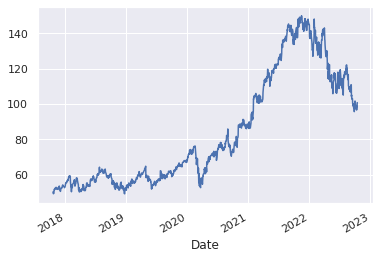

In [13]:
google['Close'].plot()

### <a name='3'></a> Ćwiczenie 123
Zamień indeks _Date_ na kolumnę. Przypisz trwale zmiany do zniennej _google_.

In [15]:
google = google.reset_index()
google

,Date,Open,High,Low,Close,Volume
0,2022-10-18,103.13,103.47,99.97,100.77,24060671
1,2022-10-17,98.86,100.93,98.83,99.97,28419192
2,2022-10-14,99.99,100.69,96.37,96.56,25410674
3,2022-10-13,95.15,99.78,94.38,99.06,34574549
4,2022-10-12,97.30,98.75,96.73,97.56,21876362
...,...,...,...,...,...,...
1252,2017-10-26,49.92,50.33,49.52,49.57,47106720
1253,2017-10-25,49.31,49.72,48.89,49.57,27965600
1254,2017-10-24,49.33,49.46,48.85,49.42,28778660
1255,2017-10-23,50.26,50.29,49.16,49.28,32754520


Przypisz dwie nowe kolumny do obiektu _google_ dodając kolumnę z aktualnym numerem miesiąca o nazwie _'Month'_ oraz z rokiem o nazwie _'Year'_.

In [16]:
google['Month'] = google['Date'].dt.month
google['Year'] = google['Date'].dt.year
google

,Date,Open,High,Low,Close,Volume,Month,Year
0,2022-10-18,103.13,103.47,99.97,100.77,24060671,10,2022
1,2022-10-17,98.86,100.93,98.83,99.97,28419192,10,2022
2,2022-10-14,99.99,100.69,96.37,96.56,25410674,10,2022
3,2022-10-13,95.15,99.78,94.38,99.06,34574549,10,2022
4,2022-10-12,97.30,98.75,96.73,97.56,21876362,10,2022
...,...,...,...,...,...,...,...,...
1252,2017-10-26,49.92,50.33,49.52,49.57,47106720,10,2017
1253,2017-10-25,49.31,49.72,48.89,49.57,27965600,10,2017
1254,2017-10-24,49.33,49.46,48.85,49.42,28778660,10,2017
1255,2017-10-23,50.26,50.29,49.16,49.28,32754520,10,2017


### <a name='4'></a> Ćwiczenie 124
Policz średnią cenę zamknięcia (_Close_) dla poszczególnego roku (pogrupuj dane po roku - kolumna _Year_ i następnie policz wartość średnią).

In [18]:
google.groupby('Year')['Close'].mean() # BARDZO PRZYDATNE !!! LICZENIE ŚREDNIEJ WZGLĘDEM ROKU

Year
2017    52.17
2018    56.10
2019    59.56
2020    73.95
2021   124.22
2022   120.04
Name: Close, dtype: float64

Otrzymane wartości przedstaw na wykresie wykorzystując metodę _plot()_.

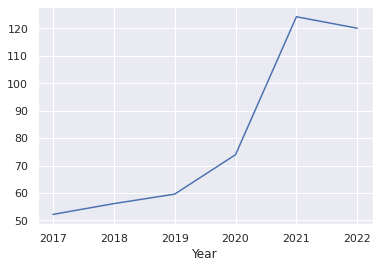

In [19]:
srednia = google.groupby('Year')['Close'].mean()

srednia.plot()

Policz średnią cenę zamknięcia (_Close_) dla miesiąca (pogrupuj dane po miesiącu - kolumna _Month_ i następnie policz wartość średnią).

In [20]:
google.groupby('Month')['Close'].mean()

Month
1    81.07
2    84.69
3    83.23
4    82.93
5    81.15
6    83.85
7    86.31
8    90.70
9    88.91
10   82.01
11   81.04
12   82.65
Name: Close, dtype: float64

Otrzymane wartości przedstaw na wykresie wykorzystując metodę _plot()_.
Zauważ, które miesiące mogą wskazywać na słabsze okresy na giełdzie.

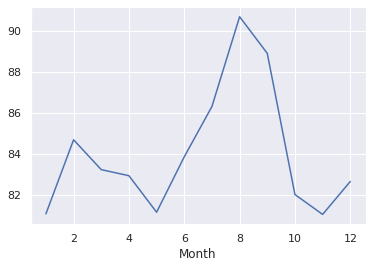

In [21]:
google.groupby('Month')['Close'].mean().plot()

### <a name='5'></a> Ćwiczenie 125
Pogrupuj dane z obiektu _google_ na poziomie roku i miesiąca. Następnie policz wartość średnią.

In [23]:
google.groupby(['Year', 'Month'])['Close'].mean()

Year  Month
2017  10       50.39
      11       52.35
      12       52.69
2018  1        56.97
      2        54.60
               ...  
2022  6       112.43
      7       112.65
      8       116.26
      9       103.33
      10       99.23
Name: Close, Length: 61, dtype: float64

### <a name='6'></a> Ćwiczenie 126
Znajdź indeks dla którego kolumna _Close_ przyjmuje wartość największą.

In [24]:
google['Close'].argmax()

229

Wytnij wiersz dla tego indeksu z obiektu _google_ jako obiekt DataFrame. Odczytaj datę.

In [26]:
google.iloc[[google['Close'].argmax()]] # ZAPAMIĘTAĆ !!!

,Date,Open,High,Low,Close,Volume,Month,Year
229,2021-11-18,148.24,150.58,147.88,149.84,35628220,11,2021


### <a name='7'></a> Ćwiczenie 127
Z obiektu _google_ wytnij kolumny _Date_, _Open_, _Close_, _Volume_.
Nie zmieniaj pierwotnego obiektu _google_!


In [27]:
google[['Date', 'Open', 'Close', 'Volume']]

,Date,Open,Close,Volume
0,2022-10-18,103.13,100.77,24060671
1,2022-10-17,98.86,99.97,28419192
2,2022-10-14,99.99,96.56,25410674
3,2022-10-13,95.15,99.06,34574549
4,2022-10-12,97.30,97.56,21876362
...,...,...,...,...
1252,2017-10-26,49.92,49.57,47106720
1253,2017-10-25,49.31,49.57,27965600
1254,2017-10-24,49.33,49.42,28778660
1255,2017-10-23,50.26,49.28,32754520


### <a name='8'></a> Ćwiczenie 128
Ustaw z powrotem indeks dla kolumny _Date_. Wyświetl obiekt _google_.

In [29]:
google = google.set_index('Date')
google

,Open,High,Low,Close,Volume,Month,Year
Date,,,,,,,
2022-10-18,103.13,103.47,99.97,100.77,24060671,10,2022
2022-10-17,98.86,100.93,98.83,99.97,28419192,10,2022
2022-10-14,99.99,100.69,96.37,96.56,25410674,10,2022
2022-10-13,95.15,99.78,94.38,99.06,34574549,10,2022
2022-10-12,97.30,98.75,96.73,97.56,21876362,10,2022
...,...,...,...,...,...,...,...
2017-10-26,49.92,50.33,49.52,49.57,47106720,10,2017
2017-10-25,49.31,49.72,48.89,49.57,27965600,10,2017
2017-10-24,49.33,49.46,48.85,49.42,28778660,10,2017


### <a name='9'></a> Ćwiczenie 129
Usuń na stałe kolumny _Year_ i _Month_ z obiektu _google_. Wyświetl obiekt _google_.

In [30]:
google = google.drop(columns=['Year','Month'])
google

,Open,High,Low,Close,Volume
Date,,,,,
2022-10-18,103.13,103.47,99.97,100.77,24060671
2022-10-17,98.86,100.93,98.83,99.97,28419192
2022-10-14,99.99,100.69,96.37,96.56,25410674
2022-10-13,95.15,99.78,94.38,99.06,34574549
2022-10-12,97.30,98.75,96.73,97.56,21876362
...,...,...,...,...,...
2017-10-26,49.92,50.33,49.52,49.57,47106720
2017-10-25,49.31,49.72,48.89,49.57,27965600
2017-10-24,49.33,49.46,48.85,49.42,28778660


### <a name='10'></a> Ćwiczenie 130
Przypisz polskie nazwy kolumn (bez polskich znaków):
* Open -> Otwarcie
* High -> Najwyzszy
* Low -> Najnizszy
* Close -> Zamkniecie
* Volume -> Wolumen

do obiektu _google_. Wyświetl obiekt _google_.

In [34]:
google.columns = ['Otwarcie','Najwyzszy','Najnizszy','Zamkniecie','Wolumen']
google

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
Date,,,,,
2022-10-18,103.13,103.47,99.97,100.77,24060671
2022-10-17,98.86,100.93,98.83,99.97,28419192
2022-10-14,99.99,100.69,96.37,96.56,25410674
2022-10-13,95.15,99.78,94.38,99.06,34574549
2022-10-12,97.30,98.75,96.73,97.56,21876362
...,...,...,...,...,...
2017-10-26,49.92,50.33,49.52,49.57,47106720
2017-10-25,49.31,49.72,48.89,49.57,27965600
2017-10-24,49.33,49.46,48.85,49.42,28778660
